# ***Spam Classifier***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the dataset with the help of pandas

In [2]:

data=pd.read_csv('Spam SMS Collection.txt',sep='\t',names=['labels','message'])

### EDA

In [3]:
data.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.shape

(5572, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
#To check the null value
data.isna().any()

labels     False
message    False
dtype: bool

In [8]:
print(data["message"].shape)

(5572,)


### Pie Chart(Spam VS Ham)

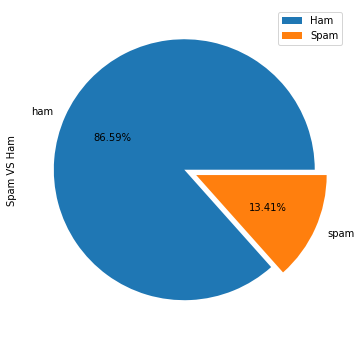

In [9]:
data["labels"].value_counts().plot(kind="pie",explode=[0,0.1],figsize=(6,6),autopct="%1.2f%%")
plt.ylabel("Spam VS Ham")
plt.legend(["Ham","Spam"])
plt.show()

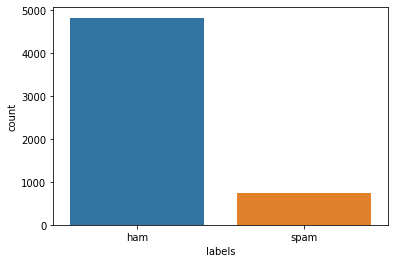

In [10]:
sns.countplot(x='labels',data=data)

### Replace Spam by 0 and Ham by 1

In [11]:
data['labels']=data['labels'].replace(to_replace=['spam', 'ham'], value=[0, 1])

In [12]:
data.head(3)

,labels,message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...


In [13]:
print("Ham")
print(data[data['labels']==1].count())
print('\n')
print("spam")
print(data[data['labels']==0].count())


Ham
labels     4825
message    4825
dtype: int64


spam
labels     747
message    747
dtype: int64


In [14]:
count=data[data['labels']==1].count()

### Upsampling

##### 
Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.



In [15]:
from sklearn.utils import resample

df_majority = data[data['labels']==1]
df_minority = data[data['labels']==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=count[0],    # to match majority class
                                 random_state=123)
 
# Combine majority class with upsampled minority class
data = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
data['labels'].value_counts()

1    4825
0    4825
Name: labels, dtype: int64

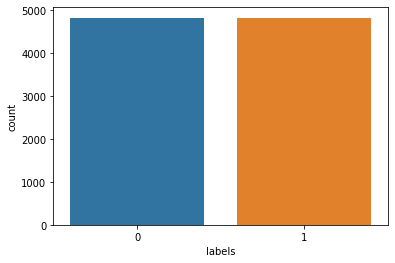

In [16]:
sns.countplot(x='labels',data=data)

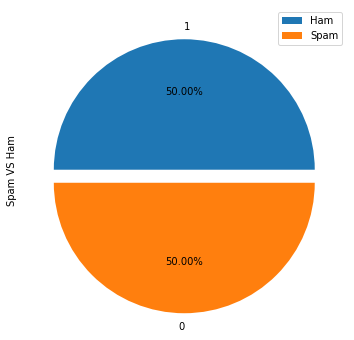

In [17]:
data["labels"].value_counts().plot(kind="pie",explode=[0,0.1],figsize=(6,6),autopct="%1.2f%%")
plt.ylabel("Spam VS Ham")
plt.legend(["Ham","Spam"])
plt.show()

In [18]:
data['length']=data['message'].apply(len)
data.head()

,labels,message,length
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61
6,1,Even my brother is not like to speak with me. ...,77


In [19]:
data['length'].describe()

count    9650.000000
mean      105.102487
std        57.030774
min         2.000000
25%        50.000000
50%       119.000000
75%       153.000000
max       910.000000
Name: length, dtype: float64

In [20]:

data[data['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f74809010b8>,
      dtype=object)

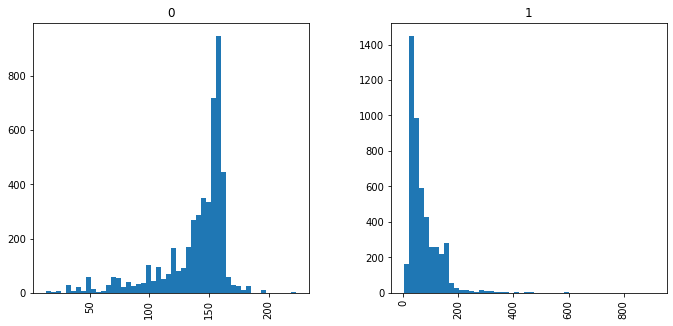

In [21]:
data.hist(column='length',by='labels' ,bins=50,figsize=(11,5))   #1--Ham         0--Spam

In [22]:
data.head()

,labels,message,length
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61
6,1,Even my brother is not like to speak with me. ...,77


### Text transformation

In [23]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:

import string
corpus=[]
def Text(message):
  review=re.sub('[^a-zA-Z]',' ',message)    
  review=review.lower()
  review=review.split()
  review=[ps.stem(word)for word in review if word not in stopwords.words('english')]
  #after applying the stemming it will give the base word
  return " ".join(review)
data['message']=data['message'].apply(Text)
data.head(5)

,labels,message,length
0,1,go jurong point crazi avail bugi n great world...,111
1,1,ok lar joke wif u oni,29
3,1,u dun say earli hor u c alreadi say,49
4,1,nah think goe usf live around though,61
6,1,even brother like speak treat like aid patent,77


In [25]:
data['message']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
6           even brother like speak treat like aid patent
                              ...                        
357     congratul ur award cd voucher gift guarante fr...
2954    urgent mobil award bonu caller prize final att...
1129    ur hmv quiz cash balanc current maxim ur cash ...
4359    date servic ask contact u someon shi call reve...
2663    hello darl today would love chat dont tell loo...
Name: message, Length: 9650, dtype: object

### Seperating spam and ham messages

In [26]:
spam_msg=data[data['labels']==0]['message']
ham_msg=data[data['labels']==1]['message']

In [27]:
spam_msg

3856    free msg singl find partner area real peopl wa...
2680    new tone week includ mcfli ab sara jorg shock ...
2804                      freemsg fav xma tone repli real
2311    nokia get win free auction take part send noki...
684     hi sue year old work lapdanc love sex text liv...
                              ...                        
357     congratul ur award cd voucher gift guarante fr...
2954    urgent mobil award bonu caller prize final att...
1129    ur hmv quiz cash balanc current maxim ur cash ...
4359    date servic ask contact u someon shi call reve...
2663    hello darl today would love chat dont tell loo...
Name: message, Length: 4825, dtype: object

### Bag of Words

In [28]:
#creating te Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
bow=cv.fit_transform(data['message']).toarray()
print(bow.shape)

(9650, 6296)


In [29]:
df_bow=pd.DataFrame(bow,columns=cv.get_feature_names())
df_bow

,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,aberdeen,abi,abil,abiola,abj,abl,abnorm,abouta,abroad,absenc,absolut,absolutli,abstract,abt,abta,aburo,abus,ac,academ,acc,accent,accentur,accept,access,accid,accident,accommod,accommodationvouch,accomod,accordin,...,youdo,youi,young,younger,youphon,your,yourinclus,yourjob,youuuuu,youwanna,yovil,yowif,yoyyooo,yr,ystrday,yt,ything,yummi,yummmm,yun,yunni,yuo,yuou,yup,yupz,zac,zaher,zealand,zebra,zed,zero,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9646,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9647,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9648,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer()
tfidf=cv.fit_transform(data["message"]).toarray()
print(tfidf.shape)

(9650, 6296)


In [31]:
df_tfidf=pd.DataFrame(tfidf,columns=cv.get_feature_names())
df_tfidf

,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,aberdeen,abi,abil,abiola,abj,abl,abnorm,abouta,abroad,absenc,absolut,absolutli,abstract,abt,abta,aburo,abus,ac,academ,acc,accent,accentur,accept,access,accid,accident,accommod,accommodationvouch,accomod,accordin,...,youdo,youi,young,younger,youphon,your,yourinclus,yourjob,youuuuu,youwanna,yovil,yowif,yoyyooo,yr,ystrday,yt,ything,yummi,yummmm,yun,yunni,yuo,yuou,yup,yupz,zac,zaher,zealand,zebra,zed,zero,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zs,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
y=data['labels']

In [33]:
X=[df_bow,df_tfidf]

In [34]:
from sklearn.model_selection import train_test_split
for i in X:
    X_train,X_test,y_train,y_test=train_test_split(i,y,test_size=0.33,random_state=0)
    #Training model using Naive BAyes classifier
    from sklearn.naive_bayes import MultinomialNB
    spam_detect=MultinomialNB().fit(X_train,y_train)
    y_pred=spam_detect.predict(X_test)

    #confusion_matrix
    from sklearn.metrics import confusion_matrix,classification_report
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
  

[[1570   38]
 [  41 1536]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1608
           1       0.98      0.97      0.97      1577

    accuracy                           0.98      3185
   macro avg       0.98      0.98      0.98      3185
weighted avg       0.98      0.98      0.98      3185

[[1565   43]
 [  44 1533]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1608
           1       0.97      0.97      0.97      1577

    accuracy                           0.97      3185
   macro avg       0.97      0.97      0.97      3185
weighted avg       0.97      0.97      0.97      3185



In [35]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

97.2684458398744